# Logistic Regression with a Neural Network mindset


 
 ## Overview of the Problem set ##

**Problem Statement**: We are given a dataset ("data.h5") containing:<br>
     - a training set of m_train images labeled as cat (y=1) or non-cat (y=0)<br>
     - a test set of m_test images labeled as cat or non-cat <br>
     - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).<br>

We will build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.



**Key steps**:
In this exercise, We will carry out the following steps: <br>
    - Initialize the parameters of the model<br>
    - Learn the parameters for the model by minimizing the cost  <br>
    - Use the learned parameters to make predictions (on the test set)<br>
    - Analyse the results  <br>
    - Conclude by predicting my own picture as cat or non cat

### SKILLS REQUIRED ###
 - Python
 - Numpy
 - Logistic regression


### Step 1 : Importing All Reqired packages

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
from public_tests import *

%matplotlib inline

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Cost after iteration 0: 2.869267
Cost after iteration 100: 1.419264
Cost after iteration 200: 1.069498
Cost after iteration 300: 0.732774
Cost after iteration 400: 0.620712
Cost after iteration 500: 0.496903
Cost after iteration 600: 0.360582
Cost after iteration 700: 0.256544
Cost after iteration 800: 0.184749
Cost after iteration 900: 0.152249
Cost after iteration 1000: 0.139484
Cost after iteration 1100: 0.129136
Cost after iteration 1200: 0.120296
Cost after iteration 1300: 0.112614
Cost after iteration 1400: 0.105863
Cost after iteration 1500: 0.099874
Cost after iteration 1600: 0.094521
Cost after iteration 1700: 0.089704
Cost after iteration 1800: 0.085346
Cost after iteration 1900: 0.081382
Cost after iteration 2000: 0.077760
Cost after iteration 2100: 0.074436
Cost after iteration 2200: 0.071376
Cost after iteration 2300: 0.068549
Cost after iteration 2400

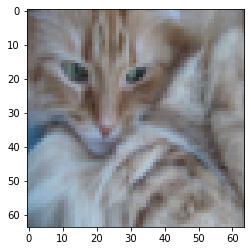

In [40]:
#Loading the datasets
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

# Example of a picture
index = 2   # 2nd image or 2nd training pattern
plt.imshow(train_set_x_orig[index])

m_train = train_set_x_orig.shape[0]
m_test =  test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))

#Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

# Normalizing the data matrices
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

# Defining sigmoid function
def sigmoid(z):   
    s = 1/(1+np.exp(-z))    
    return s

# Initializing weighted and Bias parameters
def initialize_with_zeros(dim):
    w = w = np.random.randn(dim,1)*np.sqrt(1/train_set_x_orig.shape[1]) # He initialization technique
    b = 0.1
    return w, b

# Defining Forward and Backward propagation function
def propagate(w,b,X,Y):
    m = X.shape[1]
    
    # Forward
    A = sigmoid(np.dot(w.T,X)+b)
    cost = (-1/m)*np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))
    
    #backward prop
    dw = (1/m)*np.dot(X,(A-Y).T)
    db = (1/m)*np.sum(A-Y)
    
    cost = np.squeeze(np.array(cost))

    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

# updating the w and b parameters with forward and backward functions
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    costs = []
    for i in range(num_iterations):
        grads,cost = propagate(w,b,X,Y)
        dw = grads["dw"]
        db = grads["db"]
        
        w = w-(learning_rate*dw)
        b = b-(learning_rate*db)
        
        # Record the costs
        if i%100 == 0:
            costs.append(cost)
            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

# predicting the model
def predict(w,b,X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        if A[0,i]>0.5:
            Y_prediction[0,i]=1
        else:
            Y_prediction[0,i]=0
    return Y_prediction

#Merging All Functions into a model

def model(X_train, Y_train, X_test, Y_test, num_iterations=10000, learning_rate=0.01, print_cost=False):
    w,b = initialize_with_zeros(X_train.shape[0])
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = params["w"]
    b = params["b"]
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=5000, learning_rate=0.01, print_cost=True)



## Graph to show cost function decreasing with each iterations

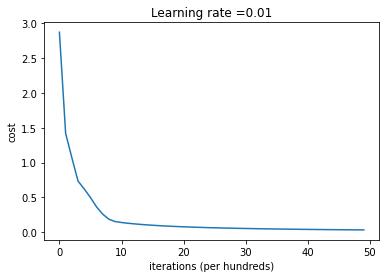

In [41]:
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

## Predicting my own picture as cat or non cat

y = 0.0, your algorithm predicts a "non-cat" picture.


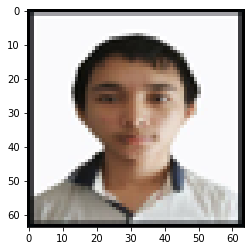

In [22]:
my_image = "my_photo.jpg" 
# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)

image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)

print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")